## Loading of Steinmetz data

includes some visualizations

In [2]:
#@title Data retrieval
import os, requests

fname = []
for j in range(3):
  fname.append('steinmetz_part%d.npz'%j)
url = ["https://osf.io/agvxh/download"]
url.append("https://osf.io/uv3mw/download")
url.append("https://osf.io/ehmw2/download")

for j in range(len(url)):
  if not os.path.isfile(fname[j]):
    try:
      r = requests.get(url[j])
    except requests.ConnectionError:
      print("!!! Failed to download data !!!")
    else:
      if r.status_code != requests.codes.ok:
        print("!!! Failed to download data !!!")
      else:
        with open(fname[j], "wb") as fid:
          fid.write(r.content)

In [3]:
#@title Data loading
import numpy as np

alldat = np.array([])
for j in range(len(fname)):
  alldat = np.hstack((alldat, np.load('steinmetz_part%d.npz'%j, allow_pickle=True)['dat']))

we are interested in sessions: 12 13 27 39 with the following regions ['CA1', 'VISam', 'PL' , 'MOs']

In [23]:
# select just one of the recordings here. 11 is nice because it has some neurons in vis ctx. 
session_interested = [12,13,27,39]
region_interested = ["CA1","VISam","PL","MOs"]
dat_12 = alldat[session_interested[0]-1]
dat_13 = alldat[session_interested[1]-1]
dat_27 = alldat[session_interested[2]-1]
dat_39 = alldat[session_interested[3]-1]
print(dat_12.keys())

dict_keys(['spks', 'wheel', 'pupil', 'lfp', 'response', 'response_time', 'bin_size', 'stim_onset', 'contrast_right', 'contrast_left', 'brain_area', 'brain_area_lfp', 'feedback_time', 'feedback_type', 'gocue', 'mouse_name', 'date_exp', 'trough_to_peak', 'waveform_w', 'waveform_u', 'active_trials', 'contrast_left_passive', 'contrast_right_passive', 'spks_passive', 'lfp_passive', 'pupil_passive', 'wheel_passive'])


In [ ]:
print(alldat.shape) # total number of sessions

(39,)


"alldat" contains 39 sessions from 10 mice, data from Steinmetz et al, 2019. The mouse had to determine which side has the highest contrast. For each dat = alldat[k], you have the following fields:

* dat['spks']: neurons by trials by time bins. Time bin = 10ms.   
* dat['brain_area']: brain area for each neuron recorded. 
* dat['contrast_right']: contrast level for the right stimulus, which is always contralateral to the recorded brain areas.
* dat['contrast_left']: contrast level for left stimulus. 
* dat['response']: which side the response was (-1, 0, 1). Choices for the right stimulus are -1.  
* dat['response_times']: when the response was registered, which has to be after the go cue. The mouse can turn the wheel before the go cue (and always does!). 
* dat['wheel']: exact position of the wheel that the mice uses to make a response, binned at 10ms. 
* dat['pupil']: pupil area  (noisy, because pupil is very small). 
* dat['lfp']: recording of the local field potential in each brain area from this experiment, binned at 10ms.
* dat['brain_area_lfp']: brain area names for the LFP channels. 




In [47]:
#@title import matplotlib and set defaults
from matplotlib import rcParams 
from matplotlib import pyplot as plt
rcParams['figure.figsize'] = [8, 4]
rcParams['font.size'] =15
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['figure.autolayout'] = True

In [10]:
dat = dat_12

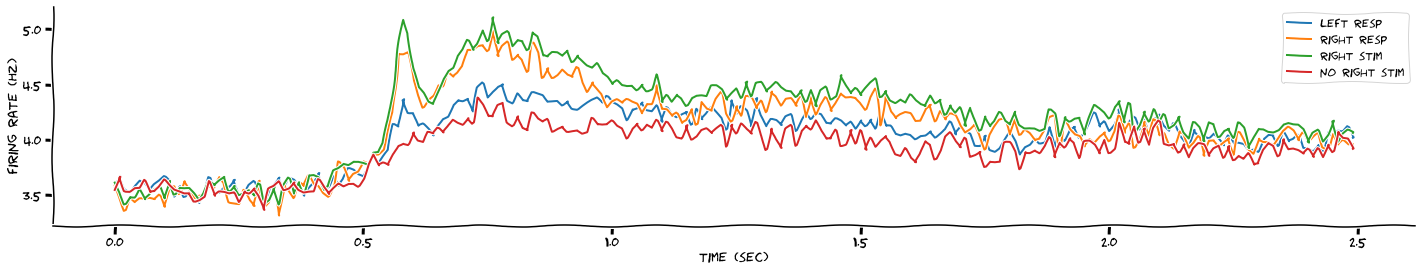

In [12]:
#@title basic plots of population average
from matplotlib import pyplot as plt
dt = dat['bin_size'] # binning at 10 ms
NT = dat['spks'].shape[-1]
with plt.xkcd():

    ax = plt.subplot(1,1,1)
    response = dat['response'] # right - nogo - left (-1, 0, 1)
    vis_right = dat['contrast_right'] # 0 - low - high
    vis_left = dat['contrast_left'] # 0 - low - high
    plt.plot(dt * np.arange(NT), 1/dt * dat['spks'][:,response>=0].mean(axis=(0,1))) # left responses
    plt.plot(dt * np.arange(NT), 1/dt * dat['spks'][:,response<0].mean(axis=(0,1))) # right responses
    plt.plot(dt * np.arange(NT), 1/dt * dat['spks'][:,vis_right>0].mean(axis=(0,1))) # stimulus on the right
    plt.plot(dt * np.arange(NT), 1/dt * dat['spks'][:,vis_right==0].mean(axis=(0,1))) # no stimulus on the right

    plt.legend(['left resp', 'right resp', 'right stim', 'no right stim'], fontsize=12)
    ax.set(xlabel  = 'time (sec)', ylabel = 'firing rate (Hz)');

In [24]:
#@title groupings of brain regions
regions = ["vis ctx", "thal", "hipp", "other ctx", "other"]
brain_groups = [["VISa", "VISam", "VISl", "VISp", "VISpm", "VISrl"], # visual cortex
                ["CL", "LD", "LGd", "LH", "LP", "MD", "MG", "PO", "POL", "PT", "RT", "SPF", "TH", "VAL", "VPL", "VPM"], # thalamus
                ["CA", "CA1", "CA2", "CA3", "DG", "SUB", "POST"], # hippocampal
                ["ACA", "AUD", "COA", "DP", "ILA", "MOp", "MOs", "OLF", "ORB", "ORBm", "PIR", "PL", "SSp", "SSs", "RSP"," TT"], # non-visual cortex
               ]

# not in this animals (but in others on figshare)
#  ["APN", "IC", "MB", "MRN", "NB", "PAG", "RN", "SCs", "SCm", "SCig", "SCsg", "ZI"], # midbrain
#  ["ACB", "CP", "GPe", "LS", "LSc", "LSr", "MS", "OT", "SNr", "SI"], # basal ganglia 
#  ["BLA", "BMA", "EP", "EPd", "MEA"] # cortical subplate

NN = len(dat['brain_area']) # number of neurons
barea = len(brain_groups) * np.ones(NN, ) # last one is "other"
for j in range(len(brain_groups)):
  barea[np.isin(dat['brain_area'], brain_groups[j])] = j # assign a number to each region

https://numpy.org/doc/stable/reference/generated/numpy.isin.html


In [25]:
print(np.shape(dat['brain_area']))
b_region = dat['brain_area']
print(np.shape(b_region))

(698,)
(698,)


In [1]:
neurons_vsc = dat['spks'][barea==0] # this includes all neurons in the region including sub areas
n_neurons = np.shape(neurons_vsc)[0]
n_trial = np.shape(neurons_vsc)[1]
n_bins = np.shape(neurons_vsc)[2]

fig = plt.figure(figsize=(8,4))
for n in range(1): #n_neurons
  for i in range(n_trial):
    for j in range(n_bins):
        if neurons_vsc[n,i,j] == 1:
            x1 = [i,i+1]
            x2 = [j/1000,j/1000]
            plt.plot(x2,x1,color = 'black')

NameError: ignored

(50, 340, 250)
(79, 340, 250)
(56, 340, 250)
(6, 340, 250)


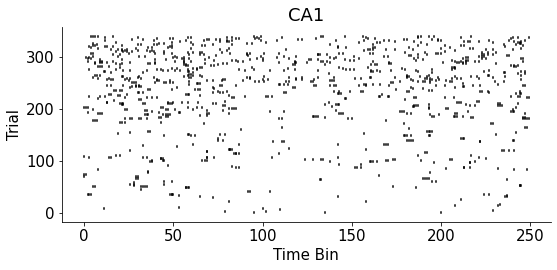

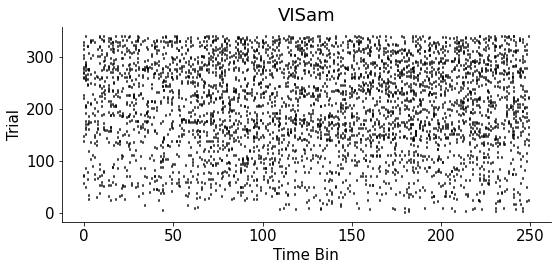

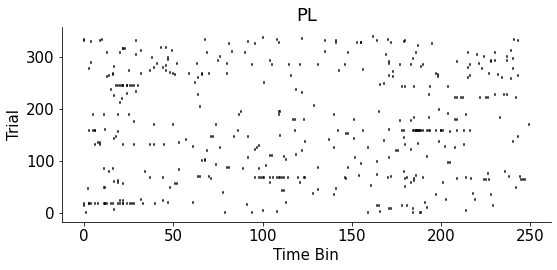

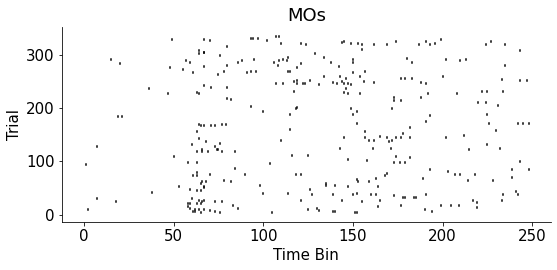

In [33]:
#this_region = region_interested[0]

for this_region in region_interested:
  neurons = dat['spks'][b_region==this_region]

  print(neurons.shape)
  n_neurons = np.shape(neurons)[0]
  n_trial = np.shape(neurons)[1]
  n_bins = np.shape(neurons)[2]

  fig = plt.figure(figsize=(8,4))
  for n in range(6): #n_neurons in range 
    for i in range(n_trial):
      for j in range(n_bins):
          if neurons[n,i,j] == 1:
              x1 = [i,i+1]
              x2 = [j,j]
              plt.plot(x2,x1,color = 'black')
  #plt.show()
  plt.xlabel('Time Bin')
  plt.ylabel('Trial')
  plt.title(this_region)

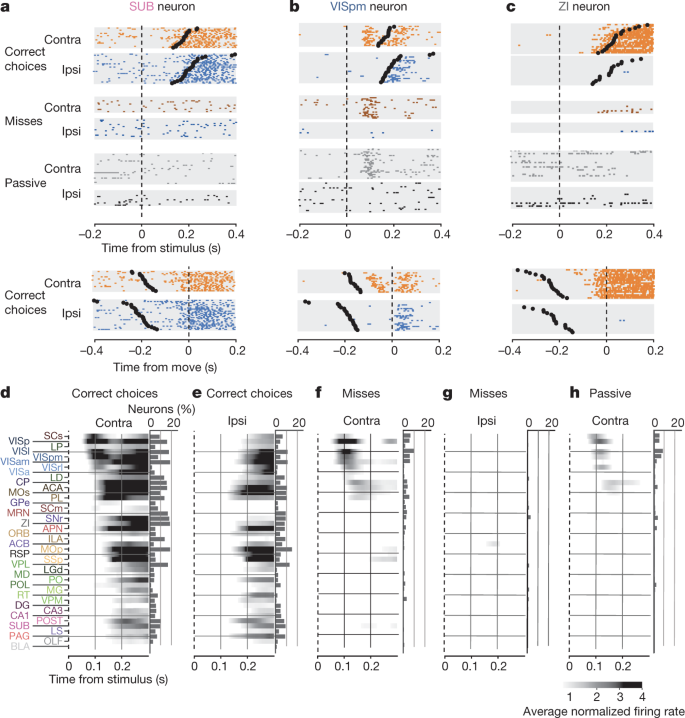

(50, 340, 250)
(50, 250)


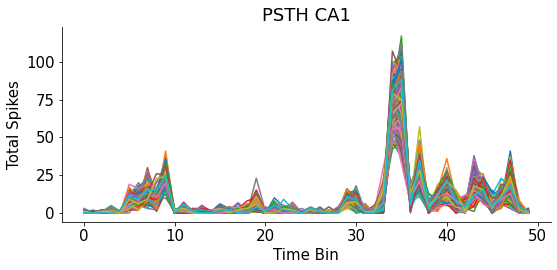

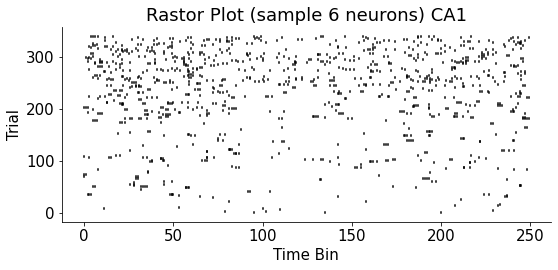

(79, 340, 250)
(79, 250)


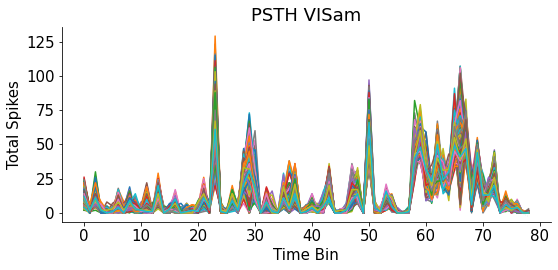

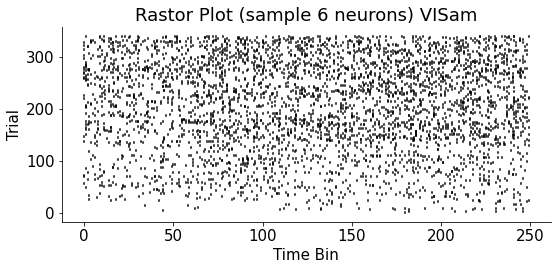

(56, 340, 250)
(56, 250)


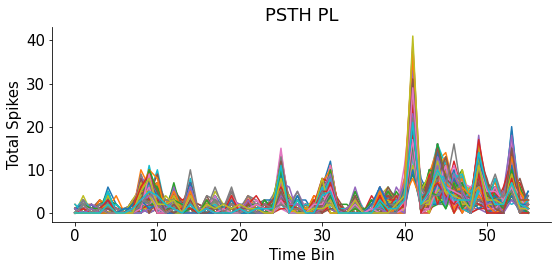

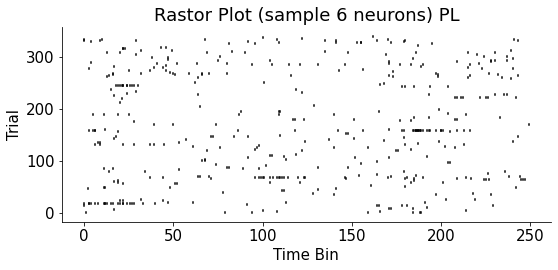

(6, 340, 250)
(6, 250)


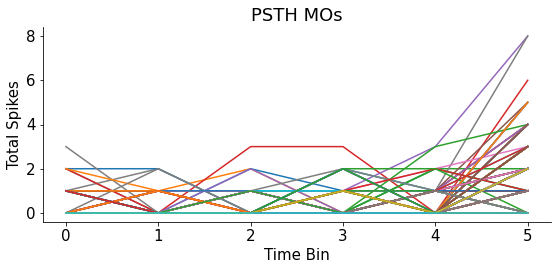

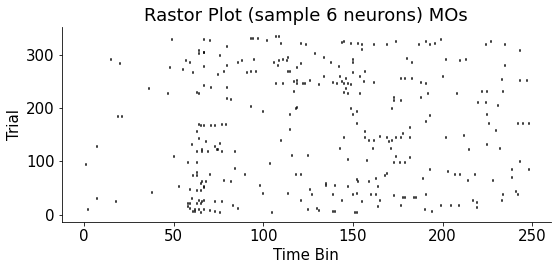

In [62]:
# PSTH - mean firing rate across trials 
for this_region in region_interested:
  neurons = dat['spks'][b_region==this_region]

  print(neurons.shape)
  n_neurons = np.shape(neurons)[0]
  n_trial = np.shape(neurons)[1]
  n_bins = np.shape(neurons)[2]

  psth= np.sum(neurons,axis=1)
  print(psth.shape)

  fig = plt.figure(211)
  plt.plot(psth)
  plt.xlabel('Time Bin')
  plt.ylabel('Total Spikes')
  plt.title('PSTH '+this_region)

  fig2 = plt.figure(212)
  for n in range(6): #n_neurons in range 
    for i in range(n_trial):
      for j in range(n_bins):
          if neurons[n,i,j] == 1:
              x1 = [i,i+1]
              x2 = [j,j]
              plt.plot(x2,x1,color = 'black')
 
  plt.xlabel('Time Bin')
  plt.ylabel('Trial')
  plt.title('Rastor Plot (sample 6 neurons) '+ this_region)
  plt.show()

In [ ]:
for j in range(4):
    print(np.isin(dat['brain_area'], brain_groups[j]))
    print(barea[np.isin(dat['brain_area'], brain_groups[j])])

[ True  True False  True False False False False False False False  True
  True False False  True  True False False  True False False  True False
  True False False  True False False False False False False  True False
 False False False  True  True False False False False  True  True False
  True  True  True False False  True False False  True False False False
  True False False  True False False False False  True False False False
 False False  True False  True  True  True False False  True False  True
  True False False False False False False  True  True  True False False
 False False False False False  True False False False False  True  True
 False False  True False  True  True  True  True False  True False False
 False False  True False False False False False  True False False False
 False False False  True False  True  True  True  True False  True False
  True False  True False  True False False False  True False False  True
 False False  True False False False  True False Fa

IndexError: ignored

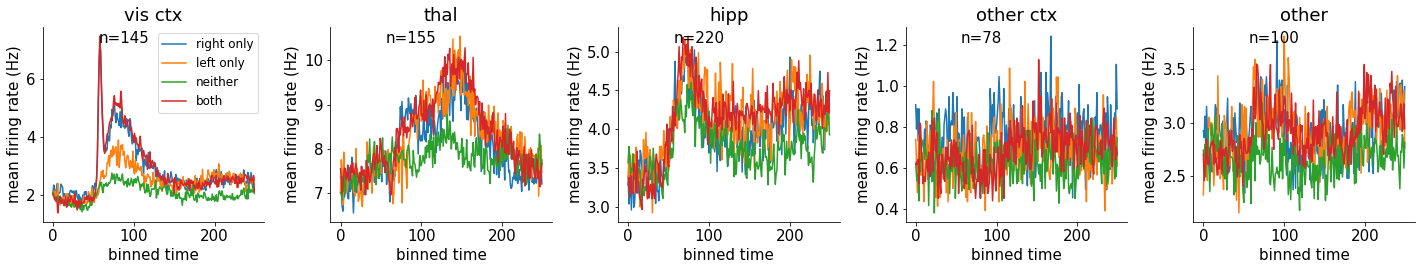

In [ ]:
#@title plots by brain region and visual conditions
for j in range(len(brain_groups)+1):
  ax = plt.subplot(1,len(brain_groups)+1,j+1)
  plt.title(regions[j])
  
  plt.plot(1/dt *  dat['spks'][barea==j][:,np.logical_and(vis_left==0, vis_right>0)].mean(axis=(0,1)))
  plt.plot(1/dt *  dat['spks'][barea==j][:,np.logical_and(vis_left>0 , vis_right==0)].mean(axis=(0,1)))
  plt.plot(1/dt *  dat['spks'][barea==j][:,np.logical_and(vis_left==0 , vis_right==0)].mean(axis=(0,1)))
  plt.plot(1/dt *  dat['spks'][barea==j][:,np.logical_and(vis_left>0, vis_right>0)].mean(axis=(0,1)))  
  plt.text(.25, .92, 'n=%d'%np.sum(barea==j), transform=ax.transAxes)
 
  if j==0:
    plt.legend(['right only', 'left only', 'neither', 'both'], fontsize=12)
  ax.set(xlabel = 'binned time', ylabel = 'mean firing rate (Hz)')
  #plt.plot(dat['spks_20ms'][barea==j][:,vis_right>0].mean(axis=(0,1)))
  #plt.plot(dat['spks_20ms'][barea==j][:,vis_right==0].mean(axis=(0,1)))

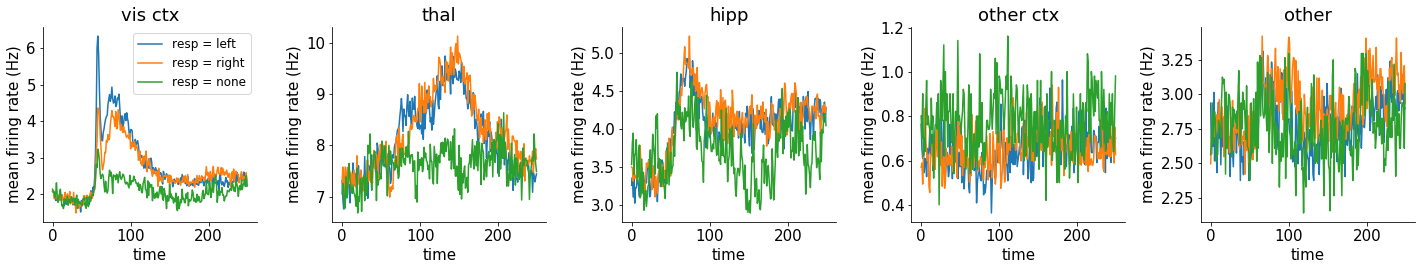

In [ ]:
#@title plots by brain region and response type
for j in range(len(brain_groups)+1):
  ax = plt.subplot(1,len(brain_groups)+1,j+1)
  plt.title(regions[j])
  if np.sum(barea==j)==0:
    continue
  plt.plot(1/dt * dat['spks'][barea==j][:,response<0].mean(axis=(0,1)))  
  plt.plot(1/dt * dat['spks'][barea==j][:,response>0].mean(axis=(0,1)))
  plt.plot(1/dt * dat['spks'][barea==j][:,response==0].mean(axis=(0,1)))
 
  if j==0:
    plt.legend(['resp = left', 'resp = right', 'resp = none'], fontsize=12)
  ax.set(xlabel = 'time', ylabel = 'mean firing rate (Hz)')


In [ ]:
#@title top PC directions from stimulus + response period, with projections of the entire duration
from sklearn.decomposition import PCA 

droll = np.reshape(dat['spks'][:,:,51:130], (NN,-1)) # first 80 bins = 1.6 sec
droll = droll - np.mean(droll, axis=1)[:, np.newaxis]
model = PCA(n_components = 5).fit(droll.T)
W = model.components_
pc_10ms = W @ np.reshape(dat['spks'], (NN,-1))
pc_10ms = np.reshape(pc_10ms, (5, -1, NT))

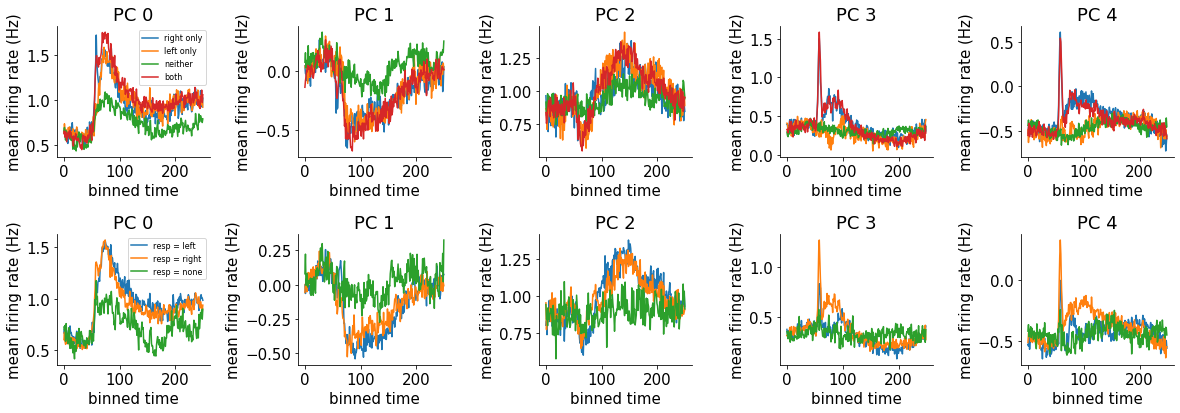

In [ ]:
#@title The top PCs capture most variance across the brain. What do they care about? 
plt.figure(figsize= (20, 6))
for j in range(len(pc_10ms)):
  ax = plt.subplot(2,len(pc_10ms)+1,j+1)
  pc1 = pc_10ms[j]

  plt.plot(pc1[np.logical_and(vis_left==0, vis_right>0), :].mean(axis=0))  
  plt.plot(pc1[np.logical_and(vis_left>0, vis_right==0), :].mean(axis=0))
  plt.plot(pc1[np.logical_and(vis_left==0, vis_right==0), :].mean(axis=0))
  plt.plot(pc1[np.logical_and(vis_left>0, vis_right>0), :].mean(axis=0))
   
  if j==0:
    plt.legend(['right only', 'left only', 'neither', 'both'], fontsize=8)
  ax.set(xlabel = 'binned time', ylabel = 'mean firing rate (Hz)')
  plt.title('PC %d'%j)

  ax = plt.subplot(2,len(pc_10ms)+1,len(pc_10ms)+1 + j+1)
  
  plt.plot(pc1[response>0, :].mean(axis=0))  
  plt.plot(pc1[response<0, :].mean(axis=0))
  plt.plot(pc1[response==0, :].mean(axis=0))

  if j==0:
    plt.legend(['resp = left', 'resp = right', 'resp = none'], fontsize=8)
  ax.set(xlabel = 'binned time', ylabel = 'mean firing rate (Hz)')
  plt.title('PC %d'%j)

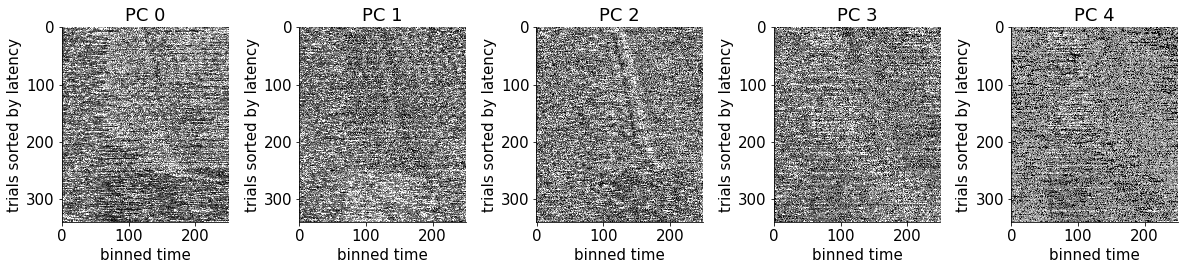

In [ ]:
#@title now sort all trials by response latency and see if the PCs care about that.
from scipy.stats import zscore

isort = np.argsort(dat['response_time'].flatten())

for j in range(len(pc_10ms)):
  ax = plt.subplot(1,len(pc_10ms)+1,j+1)
  pc1 = zscore(pc_10ms[j])
  plt.imshow(pc1[isort, :], aspect='auto', vmax=2, vmin = -2, cmap = 'gray')
  ax.set(xlabel = 'binned time', ylabel = 'trials sorted by latency')
  plt.title('PC %d'%j)

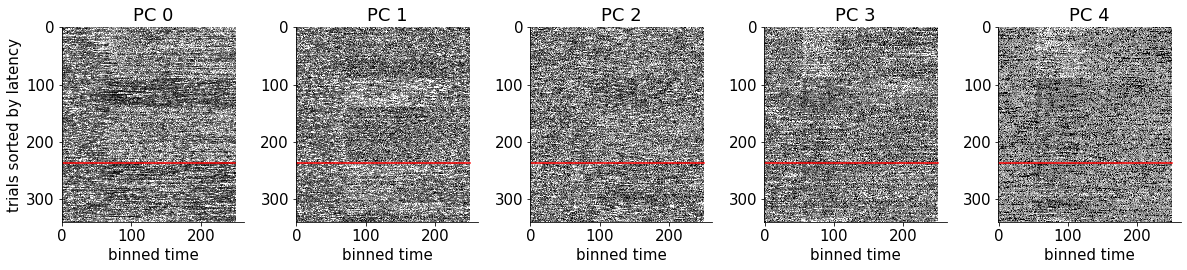

In [ ]:
#@title correct vs incorrect trials
# the following are the correct responses:
# if vis_left > vis_right : response >0
# if vis_left < vis_right : response <0
# if vis_left = vis_right : response =0
# trials below red line are incorrect
is_correct = np.sign(response)==np.sign(vis_left-vis_right)

# sort by correct, and then by response
isort = np.argsort(-is_correct.astype('float32') + response/10) 

nwrong = np.sum(is_correct)
for j in range(len(pc_10ms)):
  ax = plt.subplot(1,len(pc_10ms)+1,j+1)
  pc1 = zscore(pc_10ms[j])
  plt.imshow(pc1[isort, :], aspect='auto', vmax=2, vmin = -2, cmap = 'gray')
  ax.set(xlabel = 'binned time')
  if j==0:
    ax.set(ylabel = 'trials sorted by latency')  
  plt.title('PC %d'%j)

  plt.plot([0, NT], [nwrong, nwrong], 'r')


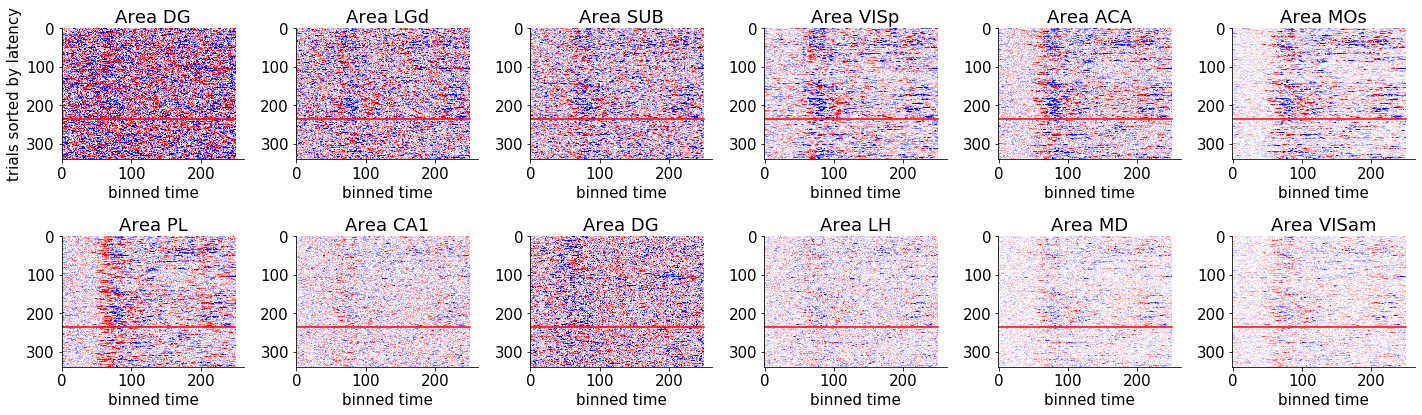

In [ ]:
# plot the LFP

is_correct = np.sign(response)==np.sign(vis_left-vis_right)
isort = np.argsort(-is_correct.astype('float32') + response/10) # sort by correct, and then by response

nwrong = np.sum(is_correct)
plt.figure(figsize=(20,6))
for j in range(len(dat['lfp'])):
  ax = plt.subplot(2,6,j+1)
  plt.imshow(dat['lfp'][j, isort], cmap = 'bwr', vmax = 50, vmin=-50, aspect='auto')
  plt.title('Area %s'%dat['brain_area_lfp'][j])
  
  plt.plot([0, NT], [nwrong, nwrong], 'r')
  ax.set(xlabel = 'binned time')
  if j==0:
    ax.set(ylabel = 'trials sorted by latency')  


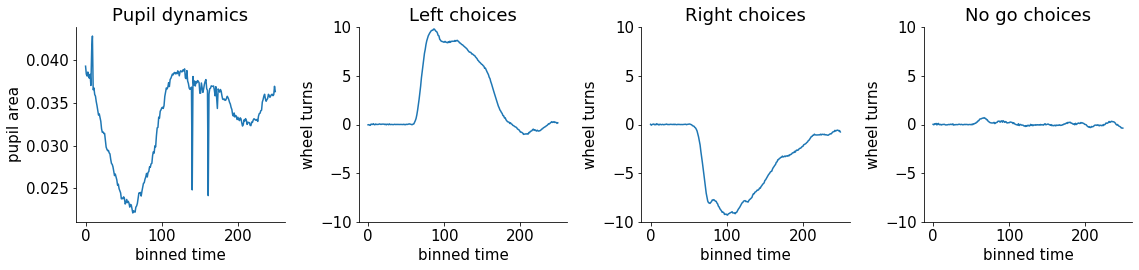

In [ ]:
# plot the behavioral data (pupil area is noisy because it's very small)

ax = plt.subplot(1,5,1)
plt.plot(dat['pupil'][0, :].mean(0));
ax.set(ylabel='pupil area', xlabel = 'binned time', title='Pupil dynamics')

yl = [-10, 10]
ax = plt.subplot(1,5,2)
plt.plot(dat['wheel'][response>0].mean(0));
ax.set(ylim=yl)
ax.set(ylim=yl, ylabel='wheel turns', xlabel = 'binned time', title='Left choices');

ax = plt.subplot(1,5,3)
plt.plot(dat['wheel'][response<0].mean(0));
ax.set(ylim=yl)
ax.set(ylim=yl, ylabel='wheel turns', xlabel = 'binned time', title='Right choices');

ax = plt.subplot(1,5,4)
plt.plot(dat['wheel'][response==0].mean(0));
ax.set(ylim=yl, ylabel='wheel turns', xlabel = 'binned time', title='No go choices');

Generating a PSTH trial aligned to GO cue and Stimulus cue
https://www.tdt.com/support/python-sdk/offline-analysis-examples/raster-peristimulus-time-histogram-psth-example/



In [ ]:
# picking brain regions in visual cortex 

b_vsc_neurons = dat['spks'][barea==0]
print(np.shape(b_vsc_neurons))
print(b_vsc_neurons[:,1,1])

(103, 253, 250)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
# 
spikes = dat['spks'][11,:,:]
n_trial = np.shape(spikes)[0]
n_bins = np.shape(spikes)[1]

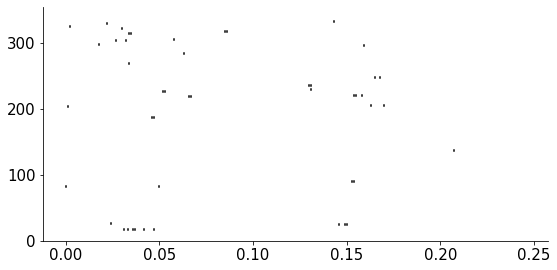

In [ ]:
# Creating Rastor Plots 
fig = plt.figure(figsize=(8,4))
for i in range(n_trial):
    for j in range(n_bins):
        if spikes[i,j] == 1:
            x1 = [i,i+1]
            x2 = [j/1000,j/1000]
            plt.plot(x2,x1,color = 'black')


KeyboardInterrupt: ignored

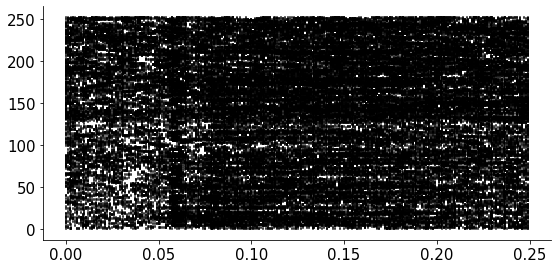

In [ ]:
neurons_vsc = dat['spks'][barea==0]
n_neurons = np.shape(neurons_vsc)[0]
n_trial = np.shape(neurons_vsc)[1]
n_bins = np.shape(neurons_vsc)[2]

fig = plt.figure(figsize=(8,4))
for n in range(n_neurons):
  for i in range(n_trial):
    for j in range(n_bins):
        if neurons_vsc[n,i,j] == 1:
            x1 = [i,i+1]
            x2 = [j/1000,j/1000]
            plt.plot(x2,x1,color = 'black')
